In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pykalman import KalmanFilter

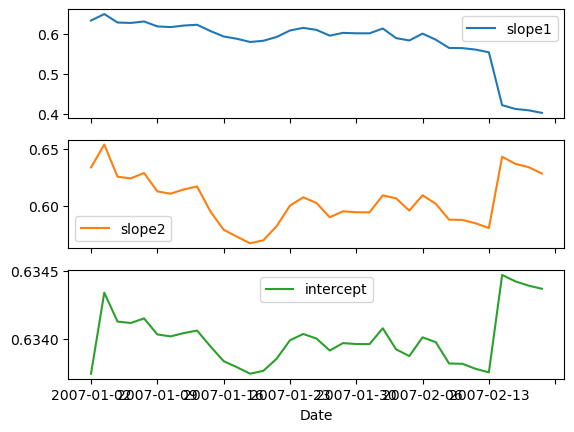

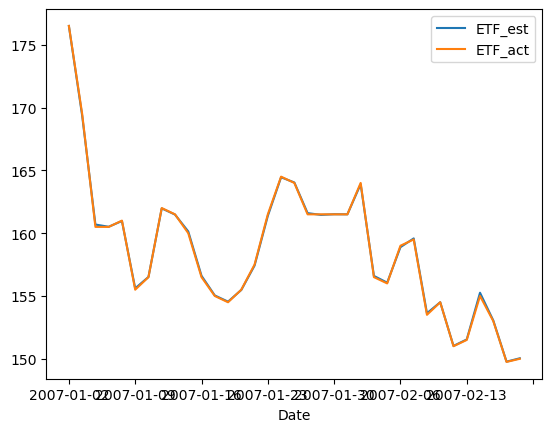

In [3]:
file_name = 'KalmanExample.txt'
df = pd.read_csv(file_name, index_col = 0)
prices = df[['ETF', 'ASSET_1', 'ASSET_2']]
delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(3)
obs_mat = np.vstack( [prices['ASSET_1'], prices['ASSET_2'],  
                        np.ones(prices['ASSET_1'].shape)]).T[:, np.newaxis]
kf = KalmanFilter(
    n_dim_obs=1,
    n_dim_state=3,
    initial_state_mean=np.zeros(3),
    initial_state_covariance=np.ones((3, 3)),
    transition_matrices=np.eye(3),
    observation_matrices=obs_mat,
    observation_covariance=1.0,
    transition_covariance=trans_cov        
)

# state_means, state_covs = kf.em(prices['ETF'].values).smooth(prices['ETF'].values)
state_means, state_covs = kf.filter(prices['ETF'].values)


# Re-construct ETF from coefficients and 'ASSET_1' and ASSET_2 values:
ETF_est = np.array([a.dot(b) for a, b in zip(np.squeeze(obs_mat), state_means)])

# Draw slope and intercept...
pd.DataFrame(
    dict(
        slope1=state_means[:, 0],
        slope2=state_means[:, 1],
        intercept=state_means[:, 2],
    ), index=prices.index
).plot(subplots=True)
plt.show()

# Draw actual y, and estimated y:
pd.DataFrame(
    dict(
        ETF_est=ETF_est,
        ETF_act=prices['ETF'].values
    ), index=prices.index
).plot()
plt.show()